[Previous Notebook](Part_2.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Home Page](../Start_Here.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Next Notebook](Resnets.ipynb)

# CNN Primer and Keras 101 - Continued 

This notebook covers introduction to Convolutional Neural Networks and it's terminologies.

**Contents of the this Notebook:**

- [Convolution Neural Networks ( CNNs )](#Convolution-Neural-Networks-(-CNNs-))
- [Why CNNs are good in Image related tasks? ](#Why-CNNs-are-good-in-Image-related-tasks?)
- [Implementing Image Classification using CNN's](#Implementing-Image-Classification-using-CNN's)
- [Conclusion](#Conclusion-:)


**By the end of this notebook you will:**

- Understand how a Convolution Neural Network works
- Write your own CNN Classifier and train it.

## Convolution Neural Networks ( CNNs ) 

Convolution Neural Networks are widely used in the field of Image Classification, Object Detection, and Face Recognition because they are very effective in reducing the number of parameters without losing on the quality of models.

Let's now understand what makes up a CNN Architecture and how it works : 

Here is an example of a CNN Architecture for a Classification task : 

![alt_text](images/cnn.jpeg)

*Source: https://fr.mathworks.com/solutions/deep-learning/convolutional-neural-network.html*

Each input image will pass it through a series of convolution layers with filters (Kernels), pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

Let us discuss in brief about the following in detail : 

- Convolution Layer 
- Strides and Padding 
- Pooling Layer
- Fully Connected Layer 

#### Convolution Layer : 

Convolution layer is the first layer to learn features from the input by preserving the relationships between neighbouring pixels. The Kernel Size is a Hyper-parameter and can be altered according to the complexity of the problem.

Now that we've discussed Kernels. Let's see how a Kernel operates on the layer.

![alt_text](images/conv.gif)

*Source: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53*

We have seen how the convolution operation works, and now let us now see how convolution operation is carried out with multiple layers.

![alt_text](images/conv_depth.png)

*Source: https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215*

Let us define the terms :

- Hin : Height dimension of the layer
- Win : Width dimension of the layer
- Din : Depth of the layer
- h : height of the kernel 
- w : width of the kernal 
- Dout : Number of kernels acting on the Layer 

Note : Din for the Layer and Kernel needs to be the same.

Here the Din and Dout is also called as the number of channels of the layer. We can notice from the first image that typically the number of channels keeps increasing over the layers while the height and width keep decreasing. This is done so that the filters learn the features from the previous layers, they can also be called as feature channels.



#### Strides and Padding 

Stride is the number of pixels shifts over the input matrix during convolution. When the stride is 1, then we move the filters to 1 pixel at a time. When the stride is 2, then we move the filters to 2 pixels at a time and so on. 

Sometimes filters do not fit perfectly on the input image. So, we have two options:
- Pad the picture with zeros (zero-padding) so that it fits
- Drop the part of the image where the filter did not fit. This is called valid padding which keeps only the valid part of the image.

#### Pooling Layer :

Pooling layers section would reduce the number of parameters when the images are too large. Spatial pooling also called subsampling or downsampling, which reduces the dimensionality of each map but retains important information. Spatial pooling can be of different types:
- Max Pooling :
    - Max pooling is one of the common pooling used, and it takes the largest element from the rectified feature map.
- Average Pooling
    - Taking the average of the elements is called Average pooling.
- Sum Pooling
    - Sum of all elements in the feature map call is called as sum pooling.

![alt_text](images/max_pool.png)

*Source: https://www.programmersought.com/article/47163598855/*

#### Fully Connected Layer :

We will then flatten the output from the convolutions layers and feed into it a _Fully Connected layer_ to generate a prediction. The fully connected layer is an ANN Model whose inputs are the features of the Inputs obtained from the Convolutions Layers. 

These Fully Connected Layers are then trained along with the _kernels_ during the training process.

We will also be comparing later between CNN's and ANN's during our example to benchmark their results on Image Classification tasks.

### Transposed Convolution :

When we apply our Convolution operation over an image , we find that the number of channels increase while the height and width of the image decreases, now in some cases, for different applications we will need to up-sample our images, _Transposed convolution_ helps to up sample the images from these layers.

Here is an animation to demonstrate Tranposed convolution : 


<table><tr>
<td> <img src="images/convtranspose.gif" alt="Drawing" style="width: 540px;"/></td>
<td> <img src="images/convtranspose_conv.gif" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

*Source https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215*

Tranposed Convolution can also be visualised as Convolution of a Layer with 2x2 padding as displayed in the right gif.


## Why CNNs are good in Image related tasks? 

1970, **David Marr** wrote a paper called [vision ](http://lolita.unice.fr/~scheer/cogsci/Marr%2082%20-%20Vision.pdf).It was a breakthrough in understating of how the brain does vision; he stated that vision task is performed in a hierarchal manner. You start simple and get complex. For example, you start with as simple as identifying edge, colours and then build upon them to detect the object and then classify them and so on.

The architecture of CNNs is designed as such to emulate the human brain's technique to deal with images. As convolutions are mainly used for extracting high-level features from the images such as edges/other patterns, these algorithms try to emulate our understanding of the vision. Certain filters do operations such as blurring the image, sharpening the image and then performing pooling operations on each of these filters to extract information from an image. As stated earlier, our understanding of vision consists that vision is a hierarchal process, and our brain deals with vision in a similar fashion. CNN also deals with understanding and classifying images similarly, thereby making them the appropriate choice for these kinds of tasks.




# Implementing Image Classification using CNN's

We will the following the same steps for Data Pre-processing as mentioned in the previous Notebook : 

In [1]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2 # % of total memory per gpu to use. 0.2 will use 20% but then uses 25%
config.gpu_options.allow_growth = False # init allocate very little and expand if needed (might be better to allocate n and not allow growth )
session = InteractiveSession(config=config)

In [3]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Print Array Size of Training Set 
print("Size of Training Images :"+str(train_images.shape))
#Print Array Size of Label
print("Size of Training Labels :"+str(train_labels.shape))

#Print Array Size of Test Set 
print("Size of Test Images :"+str(test_images.shape))
#Print Array Size of Label
print("Size of Test Labels :"+str(test_labels.shape))

#Let's See how our Outputs Look like 
print("Training Set Labels :"+str(train_labels))
#Data in the Test Set
print("Test Set Labels :"+str(test_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0

Size of Training Images :(60000, 28, 28)
Size of Training Labels :(60000,)
Size of Test Images :(10000, 28, 28)
Size of Test Labels :(10000,)
Training Set Labels :[9 0 0 ... 3 0 5]
Test Set Labels :[9 2 1 ... 8 1 5]


## Further Data pre-processing : 

You may have noticed by now that the Training Set is of Shape `(60000,28,28)`.

In CNN's, we need to feed the data in the form of a 4D Array as follows : 

`( Num_Images, X-dims, Y-dims, # of Channels of Image )`

So, as our image is grayscale, we will reshape it to `(60000,28,28,1)` before passing it to our Architecture.



In [4]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

## Defining Convolution Layers

Let us see how to define a Convolution Layer, MaxPooling Layer and Dropout 


#### Convolution Layer 

We will be using the following API to define the Convolution Layer.

```tf.keras.layers.Conv2D(filters, kernel_size, padding='valid', activation=None, input_shape)```


Let us define the parameters in brief :

- Filters: The dimensionality of the output space (i.e. the number of output filters in the convolution).
- Kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
- Padding: one of "valid" or "same" (case-insensitive).
- Activation: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

Refer here for the Full Documentation -> [Convolutional Layers](https://keras.io/layers/convolutional/) 

#### Pooling Layer 

`tf.keras.layers.MaxPooling2D(pool_size=2)`

- Pool size : Size of the max pooling windows.

Keras Documentation -> [Pooling Layers](https://keras.io/layers/pooling/)

#### Dropout 

Dropout is an approach to regularization in neural networks which helps reducing interdependent learning amongst the neurons.

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, we mean these units are not considered during a particular forward or backward pass.

It is defined by the following function :

`tf.keras.layers.Dropout(0.3)`

- Parameter :  float between 0 and 1. Fraction of the input units to drop.

Keras Documentation -> [Dropout](https://keras.io/layers/core/#dropout)

## Defining our Model and Training  

Now that we are aware of the code for building a CNN , Let us now build a 5 Layer Model :

- Input Layer : ( 28 , 28 ,1 ) 
    - Size of the Input Image
- Convolution layers :
    - First Layer : Kernel Size ( 2x2 ) and we obtain 64 layers from it. 
        - Pooling of Size ( 2 x 2) making the layer to be ( 14 x 14 x 64 )  
    - Second Layer : Kernel Size ( 2 x 2 ) and obtaining 32 layers.
        - Pooling of Size ( 2 x 2 ) making the layer to be ( 7 x 7 x 32 )
- Fully Connected Layers : 
    - Flatten the Convolution layers to nodes of 1567 = ( 7 * 7 * 32 ) 
    - Dense Layer of 256 
- Output Layer : 
    - Densely Connected Layer with 10 classes with `softmax` activation
    
![alt_text](images/our_cnn.png)
    
 Here , Let us now define our Model in Keras 

In [5]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))
#Second Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
#Fully Connected Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [7]:
model.fit(train_images, train_labels,batch_size=32 ,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.5092 - accuracy: 0.8156
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3606 - accuracy: 0.8683
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3198 - accuracy: 0.8831
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2933 - accuracy: 0.8932
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2728 - accuracy: 0.8986


In [8]:
#Evaluating the Model using the Test Set

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2543 - accuracy: 0.9023

Test accuracy: 0.9023


## Making Predictions : 

In [9]:
# Making Predictions from the test_images

predictions = model.predict(test_images)

In [10]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper Functions to Plot Images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array,true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

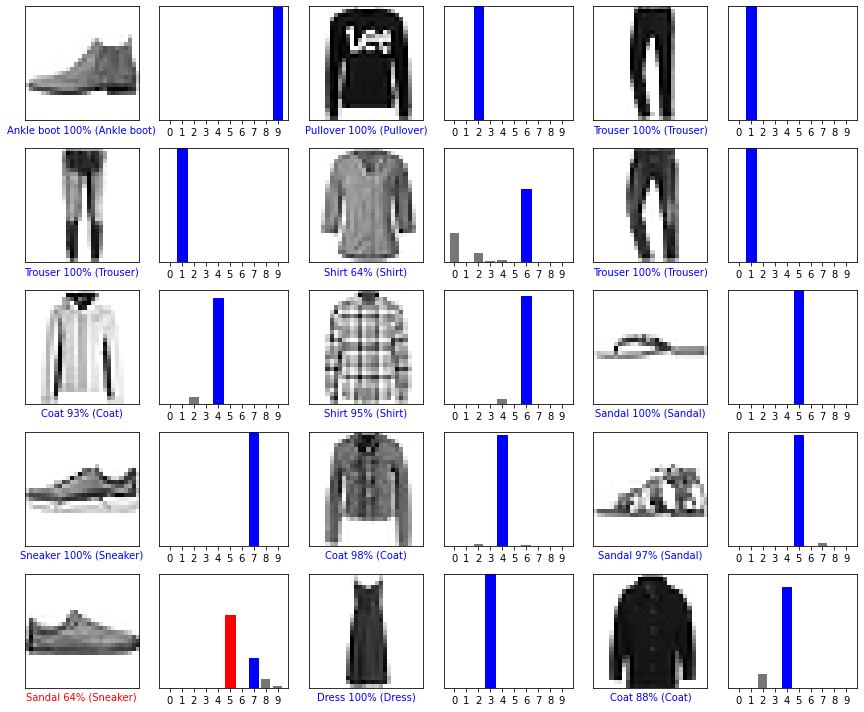

In [11]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion : 

Running both our models for 5 Epochs here is a table comparing them : 

|  Model   | Train Accuracy  | Train Loss  | Test Accuracy | Test Loss |
|----------|-----------------|-------------|---------------|-----------|
| Fully connected Neural Networks -After 5 Epochs |            0.8923 |       0.2935 |       0.8731  |     0.2432|           
| Convolution networks - After 5 Epochs  |              0.8860|       0.3094 |         0.9048 |       0.1954 |        



Congrats on coming this far, wow that you are introduced to Machine Learning and Deep Learning, You can get started on the Domain Specific Problem accessible through the Home Page.

## Exercise 
Play with different hyper-parameters ( Epoch, depth of layers , kernel size to bring down loss further

## Important:
<mark>Shutdown the kernel before clicking on “Next Notebook” to free up the GPU memory.</mark>


## Acknowledgement : 


[Transposed Convolutions explained](https://medium.com/apache-mxnet/transposed-convolutions-explained-with-ms-excel-52d13030c7e8)

[Why are CNNs used more for computer vision tasks than other tasks?](https://www.quora.com/Why-are-CNNs-used-more-for-computer-vision-tasks-than-other-tasks)

[Comprehensive introduction to Convolution](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215)

## Licensing
This material is released by NVIDIA Corporation under the Creative Commons Attribution 4.0 International (CC BY 4.0)

[Previous Notebook](Part_2.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Home Page](../Start_Here.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Next Notebook](Resnets.ipynb)